<a href="https://colab.research.google.com/github/Yashsharma009/new/blob/main/newwww7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless
!pip install cmake
!pip install dlib
!pip install face_recognition
!pip install IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=d8cfc0c9165a60cd461d0904fad2bfa20dbab77157083022be75f8f46dfc3a4c
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.1 MB/s eta 0:00:00


In [2]:
!pip uninstall opencv-python-headless -y
!pip uninstall dlib -y
!pip install opencv-python-headless
!pip install dlib


Found existing installation: opencv-python-headless 4.8.0.74
Uninstalling opencv-python-headless-4.8.0.74:
  Successfully uninstalled opencv-python-headless-4.8.0.74
  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.1 MB)
  Using cached dlib-19.24.2.tar.gz (11.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-19.24.2-cp310-cp310-linux_x86_64.whl size=4164658 sha256=bc344252e92196eda901d6e832c07501bc037659597962539889ab75d1646a90
  Stored in directory: /root/.cache/pip/wheels/9b/e2/80/888fdc098db86b463ff0c83ae5e5ca151889e901bc1e9a3a11
Successfully built dlib


In [9]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime
import csv
import matplotlib.pyplot as plt

In [4]:
train_dir = '/content/drive/MyDrive/dataset/train_dire'
train_images = []
classNames = []
rollNumbers = []
classes = []
myList = os.listdir(train_dir)
for cl in myList:
    curImg = cv2.imread(os.path.join(train_dir, cl))
    train_images.append(curImg)
    parts = os.path.splitext(cl)[0].split('_')
    if len(parts) >= 3:
        name = '_'.join(parts[:-2])
        roll_number = parts[-2]
        class_name = parts[-1]
    else:
        name = parts[0]
        roll_number = ""
        class_name = ""
    classNames.append(name)
    rollNumbers.append(roll_number)
    classes.append(class_name)

print('Names:', classNames)
print('Roll Numbers:', rollNumbers)
print('Classes:', classes)

encodeListKnown = []
for img in train_images:
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeListKnown.append(encode)

print('Encoding Complete')

Names: ['nirakh', 'avichal', 'ishwari', 'aarat', 'swaroop', 'arora', 'sheetal', 'mahi', 'suhavan5435345', '.ipynb']
Roll Numbers: ['123434', '554252', '5431632', '2104120', '7287827', '210623', '343242', '8478742', '', '']
Classes: ['hj', 'gdsgs', 'gh', 'Btech2yr', 'uh', 'xyz', 'hu', 'huh', '', '']
Encoding Complete


In [5]:
from google.colab.patches import cv2_imshow

Number of Faces Detected: 8
Face Encoding Matches: [False, False, False, False, True, True, True, False, False]
Face Distances: [0.63699068 0.6507748  0.63029417 0.65878253 0.50990628 0.54696375
 0.59743235 0.67643449 0.6903637 ]
Best Match Index: 4
Face Encoding Matches: [False, False, False, True, True, True, True, False, False]
Face Distances: [0.71413339 0.66672477 0.60903607 0.59290553 0.56577114 0.54882847
 0.50795006 0.60066393 0.60725435]
Best Match Index: 6
Face Encoding Matches: [False, True, False, False, True, False, False, False, False]
Face Distances: [0.66597789 0.5966836  0.6004516  0.7406717  0.56606958 0.61848926
 0.63366312 0.69341037 0.61325256]
Best Match Index: 4
Face Encoding Matches: [False, False, False, False, False, False, False, False, False]
Face Distances: [0.72324209 0.62844771 0.65909184 0.7476277  0.63941781 0.66744061
 0.71628702 0.67298997 0.65732715]
Best Match Index: 1
Face Encoding Matches: [False, False, False, False, False, False, False, False, F

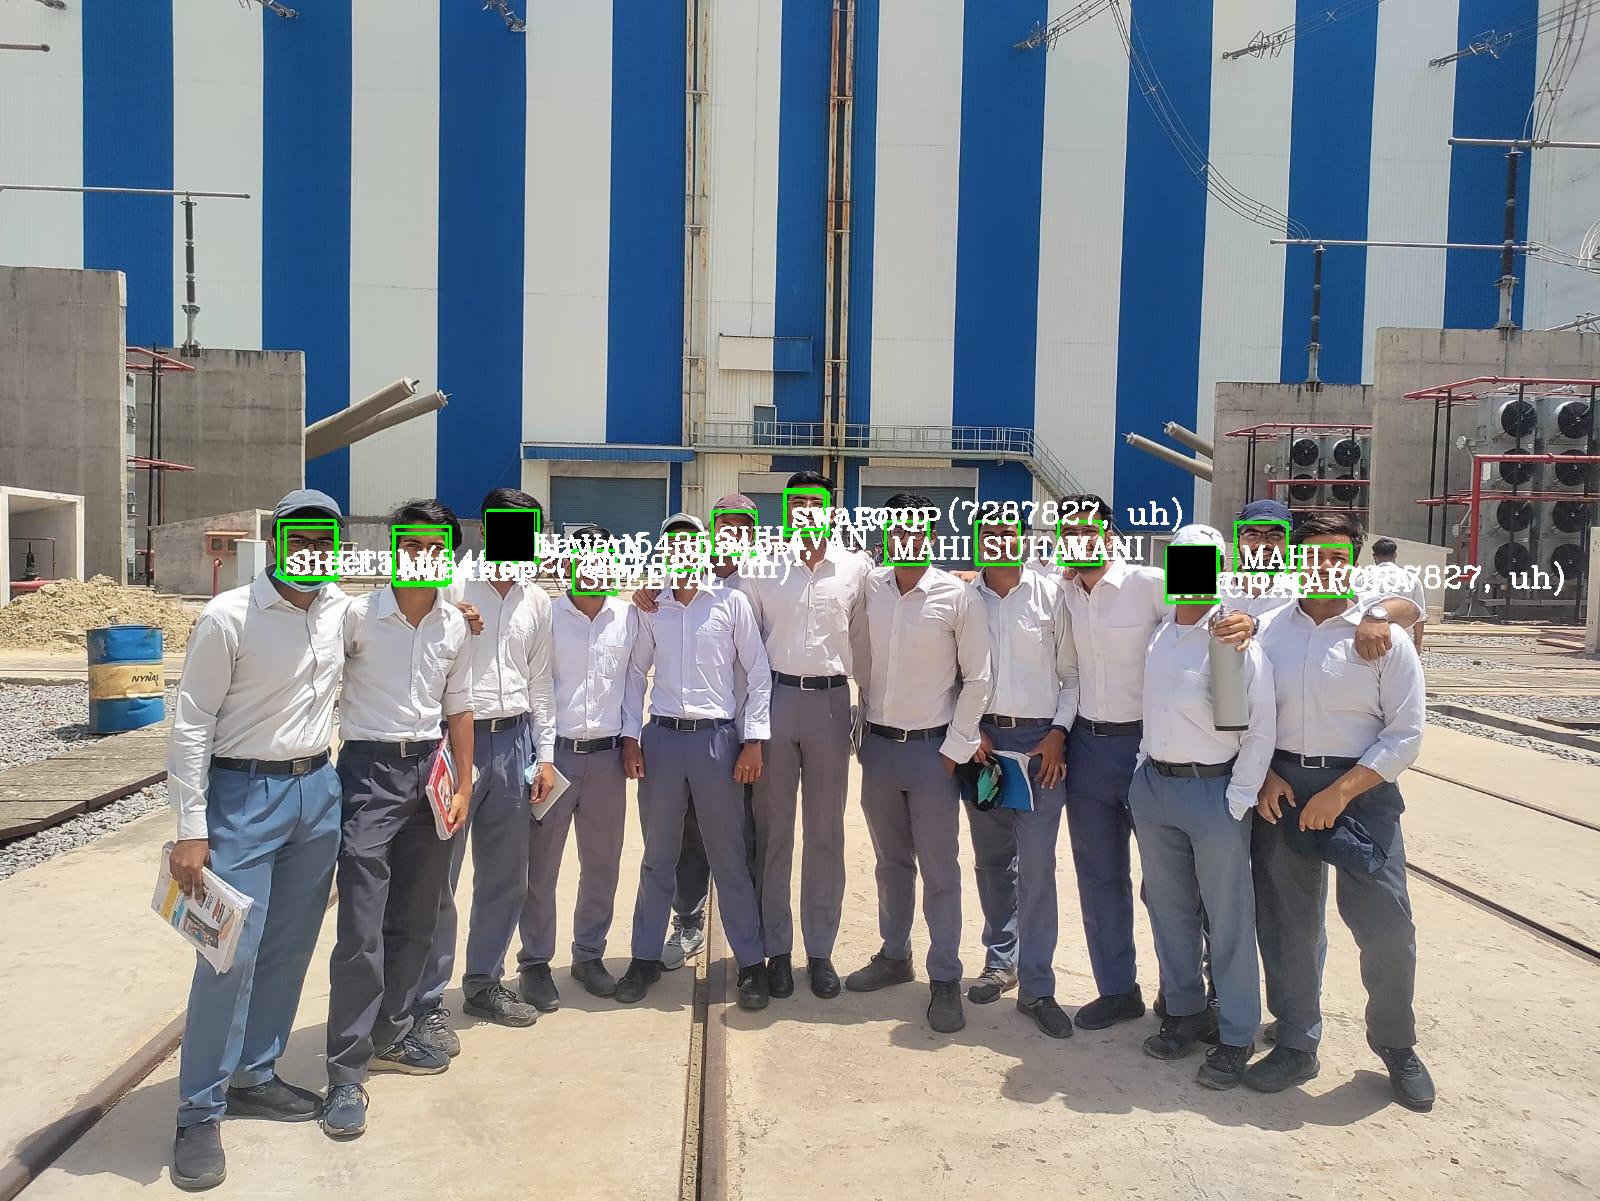

error: ignored

In [13]:
input_image_path = '/content/drive/MyDrive/dataset/test/test.jpeg'  # Update with the path to your input image
input_image = cv2.imread(input_image_path)
if input_image is not None:
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    face_locations = face_recognition.face_locations(input_image_rgb, model="cnn")

    print(f"Number of Faces Detected: {len(face_locations)}")
    encodings = face_recognition.face_encodings(input_image_rgb, face_locations)

    attendance_file = 'Attendance.csv'

    attendance_data = []
    for face_encoding, face_location in zip(encodings, face_locations):
        matches = face_recognition.compare_faces(encodeListKnown, face_encoding)
        face_distances = face_recognition.face_distance(encodeListKnown, face_encoding)
        best_match_index = np.argmin(face_distances)

        print(f"Face Encoding Matches: {matches}")
        print(f"Face Distances: {face_distances}")
        print(f"Best Match Index: {best_match_index}")

        if matches[best_match_index]:
            name = classNames[best_match_index]
            roll_number = rollNumbers[best_match_index]
            class_name = classes[best_match_index]
            attendance_data.append([name, roll_number, class_name])

            top, right, bottom, left = face_location
            cv2.rectangle(input_image, (left, top), (right, bottom), (0, 255, 0), 2)
            cv2.putText(input_image, f'{name} ({roll_number}, {class_name})', (left + 6, bottom - 6),
                        cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
        else:
            # Keep the non-matching faces blank
            cv2.rectangle(input_image, (left, top), (right, bottom), (0, 0, 0), cv2.FILLED)

    print('Attendance Data:', attendance_data)

    with open(attendance_file, 'w', newline='') as f:
        csv_writer = csv.writer(f)
        csv_writer.writerow(['Name', 'Roll Number', 'Class', 'Timestamp'])
        for data in attendance_data:
            name, roll_number, class_name = data
            now = datetime.now()
            dtString = now.strftime('%H:%M:%S')
            csv_writer.writerow([name, roll_number, class_name, dtString])

    # Read the CSV file and display its contents
    with open(attendance_file, 'r') as f:
        csv_reader = csv.reader(f)
        for row in csv_reader:
            print(row)

    cv2_imshow(input_image)
    while True:
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()
    print("Failed to load the input image.")